In [1]:
import pandas as pd
import numpy as np
from glob import glob
from transformers import BertTokenizer
import torch
from torch import nn
%matplotlib inline
import json
from tqdm import tqdm
from sklearn import metrics
import os

from model_1_to_1 import (
    BertChineseLinearPunc,
    BertChineseCNNreplaceBert,
    BertChineseBigStrideCNN,
    BertChineseSegHiddenLinearPunc,
)
from data_1_to_1 import load_file, preprocess_data, create_data_loader

### Model path

In [2]:
glob('models/*')

['models/bert-base-uncased.tar.gz',
 'models/config.json',
 'models/pytorch_model.bin',
 'models/vocab.txt',
 'models/1_albert_dense_noRnn',
 'models/1_albert_dense_rnn',
 'models/1_albert_small_dense_hidden_UniRNN',
 'models/albert_chinese_small',
 'models/albert_chinese_tiny',
 'models/albert_en',
 'models/bart_tiny',
 'models/bert_distill_chinese',
 'models/distillbert',
 'models/distillroberta_tiny',
 'models/2-BertChineseLinearPunc',
 'models/3-BertChinese4lyrHiddenCNN',
 'models/2-ChineseRobertaCNNlinearDivideConcatPunc_1cnn_k3_20',
 'models/2-ChineseRobertaCNNlinearDividedPunc',
 'models/3-BertChineseBigStrideCNN',
 'models/chinese-roberta-wwm-ext',
 'models/2-result-bert-chinese-linear',
 'models/2_ChineseRobertaNmlCNNLstmPunc',
 'models/2_ChineseRobertaCNNnoBnLstmPunc',
 'models/bert_base_chinese',
 'models/20200706_120808',
 'models/2-result-ChineseRobertaRNNnewLinearPunc',
 'models/2-ChineseRobertaNoCNNLstmPunc',
 'models/3-SegBertChineseLinearPunc',
 'models/2-ChineseRobert

In [3]:
path = 'models/3-BertChineseSegHiddenLinearPunc'

### Prepare

In [4]:
# data_test = load_file('data/zh_iwslt/test_valid')
# data_test_asr = load_file('data/zh_iwslt/test_valid')
data_test = load_file('data/zh_pfdsj_3punc/test')
data_test_asr = load_file('data/zh_pfdsj_3punc//test')
# data_test = load_file('data/NPR-podcasts/test')

In [5]:
with open(os.path.join(path, 'hyperparameters.json'), 'r') as f:
    hyperparameters = json.load(f)
hyperparameters

{'segment_size': 100,
 'dropout': 0.3,
 'epochs_top': 100,
 'iterations_top': 3,
 'batch_size_top': 40,
 'learning_rate_top': 1e-05,
 'epochs_all': 100,
 'iterations_all': 3,
 'batch_size_all': 10,
 'learning_rate_all': 1e-05,
 'seq_len': 200}

In [6]:
tokenizer = BertTokenizer.from_pretrained(os.path.join("models", 'bert_base_chinese'), do_lower_case=True)

punctuation_enc = {
    'O': 0,
    '，': 1,
    '。': 2,
    '？': 3
}

# punctuation_enc = {
#     'O': 0,
#     'PERIOD': 1
# }

# segment_size = hyperparameters['segment_size']
segment_size = 200

In [7]:
X_test, y_test = preprocess_data(data_test, tokenizer, punctuation_enc, segment_size)
X_test_asr, y_test_asr = preprocess_data(data_test_asr, tokenizer, punctuation_enc, segment_size)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
output_size = len(punctuation_enc)
dropout = hyperparameters['dropout']
bert_punc = BertChineseSegHiddenLinearPunc(segment_size, output_size, dropout, None).to(device)

fucking code**************
fucking code**************


### Model progress

In [10]:
progress = pd.read_csv(os.path.join(path, 'progress.csv'), delimiter=';')
progress

,time,epoch,iteration,training loss,loss,accuracy,f1_O,f1_，,f1_。,f1_？
0,2020-07-06 11:46:28,1,1,0.2133,0.1873,0.9296,0.9749,0.3222,0.5823,0.0000
1,2020-07-06 11:46:57,1,2,0.1533,0.1209,0.9572,0.9862,0.6729,0.7470,0.0000
2,2020-07-06 11:47:26,1,3,0.1169,0.1043,0.9629,0.9882,0.7218,0.7714,0.0197
3,2020-07-06 11:47:56,2,1,0.1323,0.0953,0.9659,0.9889,0.7402,0.7880,0.5945
4,2020-07-06 11:48:26,2,2,0.0889,0.0907,0.9671,0.9893,0.7500,0.7926,0.6484
5,2020-07-06 11:48:55,2,3,0.1020,0.0884,0.9684,0.9898,0.7553,0.8062,0.6086
6,2020-07-06 11:49:25,3,1,0.1064,0.0865,0.9694,0.9902,0.7721,0.8065,0.6981
7,2020-07-06 11:49:54,3,2,0.0680,0.0856,0.9697,0.9902,0.7745,0.8148,0.6997
8,2020-07-06 11:50:23,3,3,0.0798,0.0821,0.9707,0.9906,0.7802,0.8172,0.7260
9,2020-07-06 11:50:53,4,1,0.0927,0.0839,0.9712,0.9909,0.7761,0.8228,0.7300


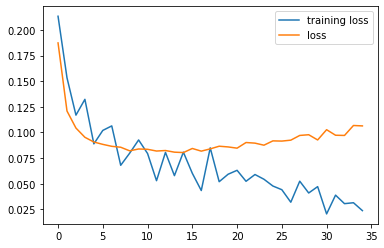

In [11]:
progress[['training loss', 'loss']].plot();

/home/zz/anaconda3/envs/torch_gpu_1.5/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zz/anaconda3/envs/torch_gpu_1.5/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zz/anaconda3/envs/torch_gpu_1.5/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zz/anaconda3/envs/torch_gpu_1.5/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zz/anaconda3/envs/torch_gpu_1.5/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zz/anaco

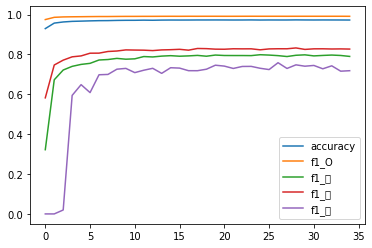

In [12]:
progress[['accuracy', 'f1_O', 'f1_，', 'f1_。', 'f1_？']].plot();
# progress[['accuracy', 'f1_O', 'f1_PERIOD']].plot();

### Model evaluation

In [13]:
bert_punc.load_state_dict(torch.load(os.path.join(path, 'model')))
bert_punc.eval();

In [14]:
batch_size = 200
data_loader_test = create_data_loader(X_test, y_test, False, batch_size)
data_loader_test_asr = create_data_loader(X_test_asr, y_test_asr, False, batch_size)

In [15]:
def predictions(data_loader):
    y_pred = []
    y_true = []
    for inputs, labels in tqdm(data_loader, total=len(data_loader)):
        with torch.no_grad():
            inputs, labels = inputs.cuda(), labels.cuda()
            output = bert_punc(inputs)
            y_pred += list(output.argmax(dim=1).cpu().data.numpy().flatten())
            y_true += list(labels.cpu().data.numpy().flatten())
    return y_pred, y_true

In [16]:
def evaluation(y_pred, y_test):
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(
        y_test, y_pred, average=None, labels=[1, 2, 3])
    overall = metrics.precision_recall_fscore_support(
        y_test, y_pred, average='macro', labels=[1, 2, 3])
    result = pd.DataFrame(
        np.array([precision, recall, f1]), 
        columns=list(['O', 'COMMA', 'PERIOD', 'QUESTION'])[1:], 
        index=['Precision', 'Recall', 'F1']
    )
    result['OVERALL'] = overall[:3]
    return result

In [17]:
# def evaluation(y_pred, y_test):
#     precision, recall, f1, _ = metrics.precision_recall_fscore_support(
#         y_test, y_pred, average=None, labels=[1])
#     overall = metrics.precision_recall_fscore_support(
#         y_test, y_pred, average='macro', labels=[1])
#     result = pd.DataFrame(
#         np.array([precision, recall, f1]), 
#         columns=list(punctuation_enc.keys())[1:], 
#         index=['Precision', 'Recall', 'F1']
#     )
#     result['OVERALL'] = overall[:3]
#     return result

#### Test

In [18]:
y_pred_test, y_true_test = predictions(data_loader_test)
eval_test = evaluation(y_pred_test, y_true_test)
eval_test

  0%|          | 0/3 [00:00<?, ?it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 33%|███▎      | 1/3 [00:01<00:03,  1.80s/it]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 67%|██████▋   | 2/3 [00:03<00:01,  1.74s/it]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


,COMMA,PERIOD,QUESTION,OVERALL
Precision,0.782424,0.791958,0.747573,0.773985
Recall,0.726316,0.836467,0.627717,0.730167
F1,0.753327,0.813605,0.682422,0.749785


In [19]:
# https://www.isca-speech.org/archive/Interspeech_2016/pdfs/1517.PDF
ref_test = pd.DataFrame({
    'COMMA':       [0.655, 0.471, 0.548],
    'PERIOD':       [0.733, 0.725, 0.729],
    'QUESTION':       [0.707, 0.630, 0.667],
    'OVERALL':  [0.700, 0.597, 0.644]
}, index=['Precision', 'Recall', 'F1'])
ref_test

,COMMA,PERIOD,QUESTION,OVERALL
Precision,0.655,0.733,0.707,0.700
Recall,0.471,0.725,0.630,0.597
F1,0.548,0.729,0.667,0.644


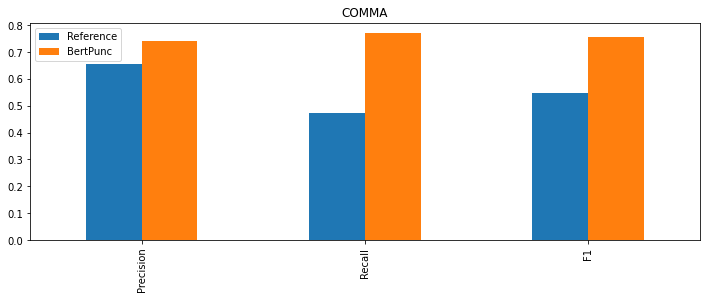

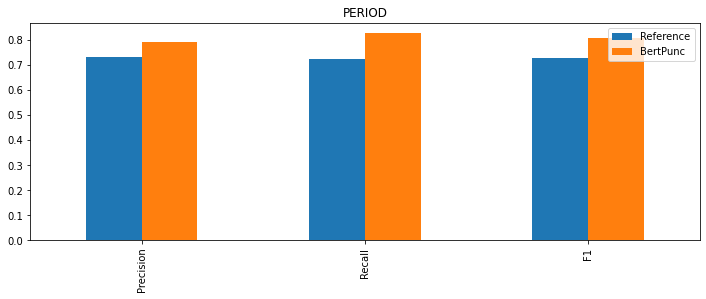

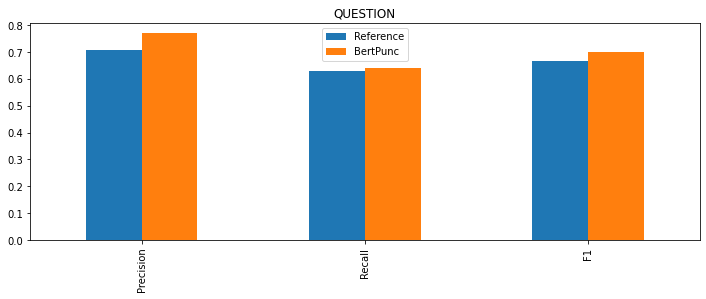

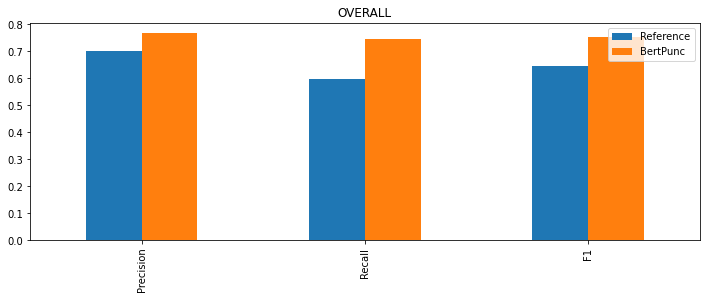

In [20]:
for col in ref_test.columns:
    pd.DataFrame({'Reference': ref_test[col], 'BertPunc': eval_test[col]}).plot.bar(
        title=col, figsize=(12, 4))

#### Test ASR

In [20]:
y_pred_test_asr, y_true_test_asr = predictions(data_loader_test_asr)
eval_test_asr = evaluation(y_pred_test_asr, y_true_test_asr)
eval_test_asr

100%|██████████| 14/14 [00:09<00:00,  1.64it/s]


,COMMA,PERIOD,QUESTION,OVERALL
Precision,0.485539,0.771995,0.469388,0.575641
Recall,0.694236,0.770087,0.657143,0.707155
F1,0.571429,0.771040,0.547619,0.630029


In [21]:
# https://www.isca-speech.org/archive/Interspeech_2016/pdfs/1517.PDF
ref_test_asr = pd.DataFrame({
    'COMMA':    [0.596, 0.429, 0.499],
    'PERIOD':   [0.707, 0.720, 0.714],
    'QUESTION': [0.607, 0.486, 0.540],
    'OVERALL':  [0.660, 0.573, 0.614]
}, index=['Precision', 'Recall', 'F1'])
ref_test_asr

,COMMA,PERIOD,QUESTION,OVERALL
Precision,0.596,0.707,0.607,0.660
Recall,0.429,0.720,0.486,0.573
F1,0.499,0.714,0.540,0.614


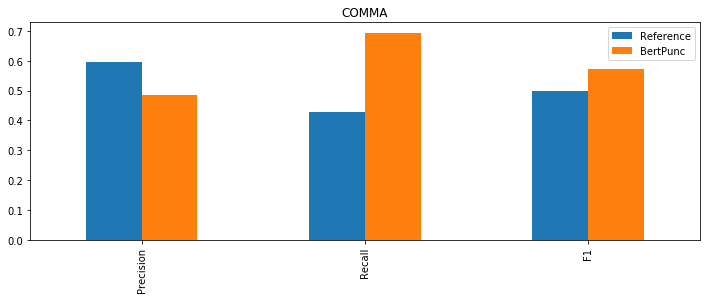

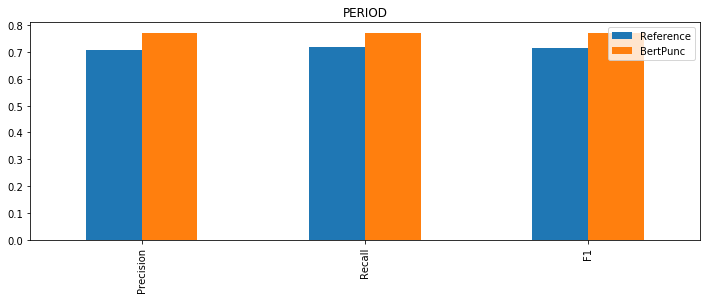

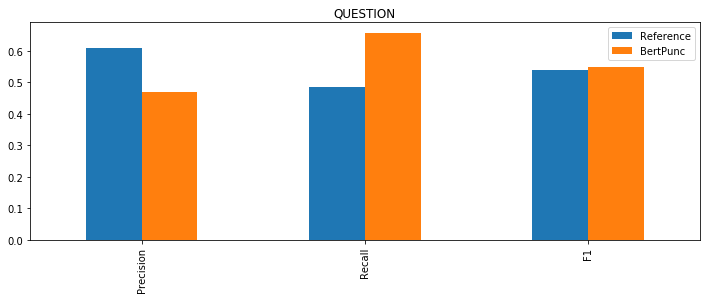

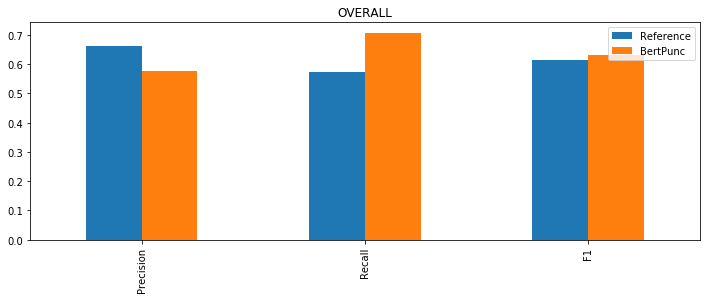

In [22]:
for col in ref_test_asr.columns:
    pd.DataFrame({'Reference': ref_test_asr[col], 'BertPunc': eval_test_asr[col]}).plot.bar(
        title=col, figsize=(12, 4))